# Resumo

## Contexto 
O presente problema se refere aos dados de vinhos portugueses
"Vinho Verde", que possuem variantes de vinho branco e tinto.
Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis (por
exemplo, não há dados sobre tipo de uva, marca do vinho, preço
de venda, etc).


## Objetivo

Criar um modelo para estimar a qualidade do vinho.
Informação sobre os atributos. Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool
Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

## Execução 

1. Faça uma análise exploratória para avaliar a consistência
dos dados e identificar possíveis variáveis que impactam
na qualidade do vinho.

2. Para a realização deste teste você pode utilizar o
software de sua preferência (Python ou R), só pedimos
que compartilhe conosco o código fonte (utilizando um
repositório git). Além disso, inclua um arquivo
README.md onde você deve cobrir as respostas
para os 5 pontos abaixo:

a. Como foi a definição da sua estratégia de
modelagem?

b. Como foi definida a função de custo utilizada?

c. Qual foi o critério utilizado na seleção do modelo
final?

d. Qual foi o critério utilizado para validação do
modelo? Por que escolheu utilizar este método?

e. Quais evidências você possui de que seu modelo é
suficientemente bom

# Análise Exploratória dos Dados

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [111]:
df = pd.read_csv('winequality.csv',encoding = 'ISO-8859-1', delimiter=';',low_memory = False)

# Definição da Estratégia de Modelagem

## Informações gerais sobre o dataframe

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


In [113]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Algo de errado com a variável Alcohol

Analisando a variável e seus valores únicos provavelmente houve algum erro de conversão de valores na construção da tabela, o mais provável é que os valores estejam com o padrão de separador decimal "." e alguém tenha aberto em outro padrão. São poucas as observações com esse tipo de erro, apenas 40 em  6,498 o que resulta em 0.6% da base. Vamos transformar de string para float a variável alcohol.

In [114]:
df['alcohol'].unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [115]:
df['alcohol'] = df['alcohol'].str[:5]
df['alcohol'] = df['alcohol'].astype(float)
df.loc[df['alcohol'] > 100, 'alcohol'] = df['alcohol']/100
df['alcohol'].unique()

array([ 8.8  ,  9.5  , 10.1  ,  9.9  ,  9.6  , 11.   , 12.   ,  9.7  ,
       10.8  , 12.4  , 11.4  , 12.8  , 11.3  , 10.5  ,  9.3  , 10.   ,
       10.4  , 11.6  , 12.3  , 10.2  ,  9.   , 11.2  ,  8.6  ,  9.4  ,
        9.8  , 11.7  , 10.9  ,  9.1  ,  8.9  , 10.3  , 12.6  , 10.7  ,
       12.7  , 10.6  ,  9.2  ,  8.7  , 11.5  , 11.8  , 12.1  , 11.1  ,
        8.5  , 12.5  , 11.9  , 12.2  , 12.9  , 13.9  , 14.   , 13.5  ,
       13.3  , 13.2  , 13.7  , 13.4  , 13.   ,  8.   , 13.1  , 13.6  ,
        8.4  , 14.2  , 11.94 ,  1.289,  1.146, 10.98 ,  1.003,  1.143,
        1.053,  9.533,  1.093,  1.136,  1.133,  1.106,  9.733, 11.05 ,
        9.75 , 11.35 ,  9.55 , 10.55 , 11.45 , 14.05 ,  1.233, 12.75 ,
       13.8  , 12.15 , 13.05 ,  1.126,  1.056,  1.173, 11.75 , 10.65 ,
        1.096,  1.013, 10.15 ,  1.046,  1.163, 12.25 , 11.85 , 11.65 ,
       13.55 ,  1.313, 11.95 ,  1.206, 11.55 ,  9.633, 12.05 , 14.9  ,
        9.566,  1.356,  9.95 ,  9.233,  9.25 ,  9.05 , 10.75 ])

## Descrição estatística do dataframe

In [116]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,10.441829,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,1.358334,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,1.003000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


## Gráficos de distribuição das variáveis numéricas

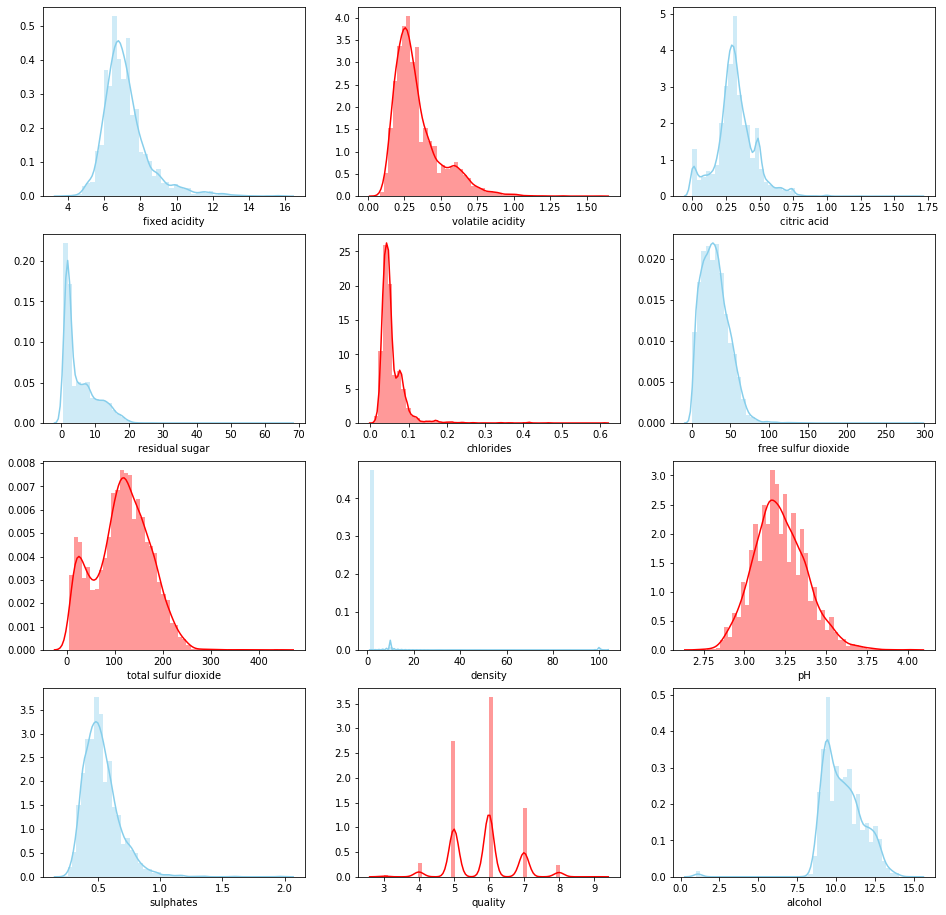

In [117]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

sns.distplot(df['fixed acidity'] , color = 'skyblue', label = 'age_years', ax = axes[0,0])
sns.distplot(df['volatile acidity'] , color = 'red', label = 'volatile acidity', ax = axes[0,1])
sns.distplot(df['citric acid'] , color = 'skyblue', label = 'citric acid', ax = axes[0,2])

sns.distplot(df['residual sugar'] , color = 'skyblue', label = 'residual sugar', ax = axes[1,0])
sns.distplot(df['chlorides'] , color = 'red', label = 'chlorides', ax=axes[1,1])
sns.distplot(df['free sulfur dioxide'] , color = 'skyblue', label = 'free sulfur dioxide', ax = axes[1,2])

sns.distplot(df['total sulfur dioxide'] , color = 'red', label = 'total sulfur dioxide', ax = axes[2,0])
sns.distplot(df['density'] , color = 'skyblue', label = 'density', ax = axes[2,1])
sns.distplot(df['pH'] , color = 'red', label = 'pH', ax = axes[2,2])

sns.distplot(df['sulphates'] , color = 'skyblue', label = 'sulphates', ax = axes[3,0])
sns.distplot(df['quality'] , color = 'red', label  ='quality', ax = axes[3,1])
sns.distplot(df['alcohol'] , color = 'skyblue', label = 'alcohol', ax = axes[3,2])

## Análise de correlação

A variável quality do dataset apresenta baixa correlação com as outras variáveis. O maior nível de correlação ocorre com a variável alcohol. Como o próprio nome indica a variável quality é uma boa candidata para construir uma variável target, como por exemplo uma variável binária 0 ou 1 para um modelo de regressão logística.

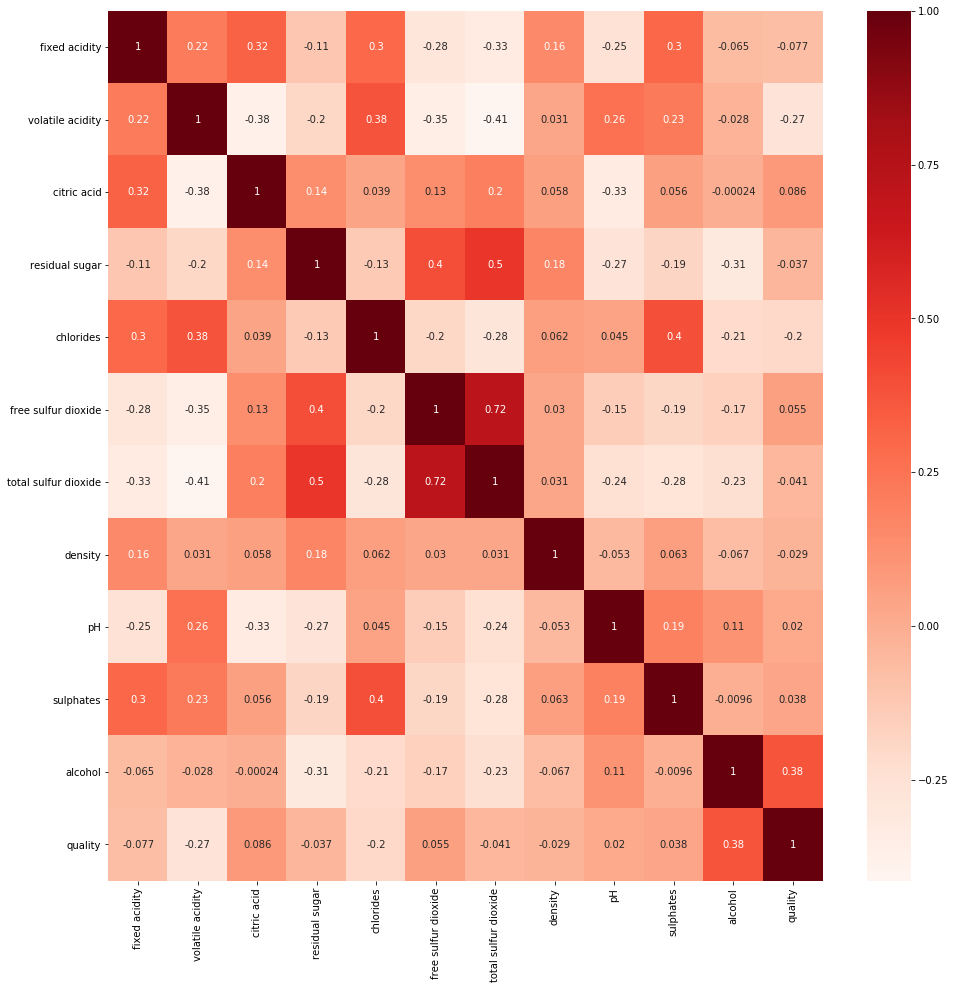

In [118]:
plt.figure(figsize=(16,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [120]:
df.groupby(['type']).agg({
'type':'count',
'volatile acidity':'mean',
'citric acid':'mean',
'residual sugar':'mean',
'chlorides':'mean',
'free sulfur dioxide':'mean',
'total sulfur dioxide':'mean',
'density':'mean',
'pH':'mean',
'sulphates':'mean',
'quality':'mean',
'alcohol':'mean',
})

,type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
type,,,,,,,,,,,,
Red,1599,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,5.636023,10.397822
White,4898,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,1.548363,3.188267,0.489847,5.877909,10.456196


# Definindo a função de custos

## Construindo a variável target

Construimos uma variável target usando a variável quality como base. Esta variável apresenta valores esparsos como se fosse um score, como mostra a distribuição abaixo, a mediana 6 tendo maior frequência e com menores frequências para valores acima de 6, isto pode ser um indicador para o ponto de corte de uma variável binária, que será definida como 1 para valores de quality acima de 5 e com valor 0 para valores de quality abaixo ou menor que 5.

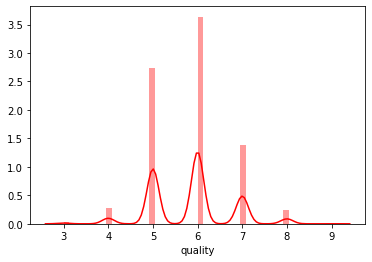

In [121]:
sns.distplot(df['quality'] , color = 'red', label  ='quality')

In [233]:
def target_var_func(a):
    if a['quality'] > 5:
        return 1
    else:
        return 0

df['target_var'] = df.apply(target_var_func, axis = 1)


df.groupby(['target_var','type']).agg({
'target_var':'count',
'volatile acidity':'mean',
'citric acid':'mean',
'residual sugar':'mean',
'chlorides':'mean',
'free sulfur dioxide':'mean',
'total sulfur dioxide':'mean',
'density':'mean',
'pH':'mean',
'sulphates':'mean',
'quality':'mean',
'alcohol':'mean',
})

target_var  volatile acidity  citric acid  residual sugar  \
target_var type                                                               
0          Red           744          0.589503     0.237755        2.542070   
           White        1640          0.310265     0.334311        7.054451   
1          Red           855          0.474146     0.299883        2.535965   
           White        3258          0.262121     0.334131        6.057658   

                  chlorides  free sulfur dioxide  total sulfur dioxide  \
target_var type                                                          
0          Red     0.092989            16.567204             54.645161   
           White   0.051436            35.338720            148.597866   
1          Red     0.082661            15.272515             39.352047   
           White   0.042921            35.292664            133.207489   

                   density        pH  sulphates   quality    alcohol  
target_var type                                                       
0          Red    2.572185  3.311653   0.618535  4.901882   9.926478  
           White  1.747559  3.170457   0.481506  4.876220   9.819693  
1          Red    1.892408  3.310643   0.692620  6.274854  10.807973  
           White  1.448093  3.197231   0.494045  6.382136  10.776596

# Modelo de regressão logística

## Fazendo a separação do dataframe em teste e treinamento

In [234]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Distribuição das variáveis para o dataframe de treino

Pelas distribuições das variáveis abaixo, a função de separação do scikitlearn entre dataframes de teste e treinamento funcionou bem, já que as distribuições tem o mesmo comportamente que o dataframe de teste e o dafaframe completo.

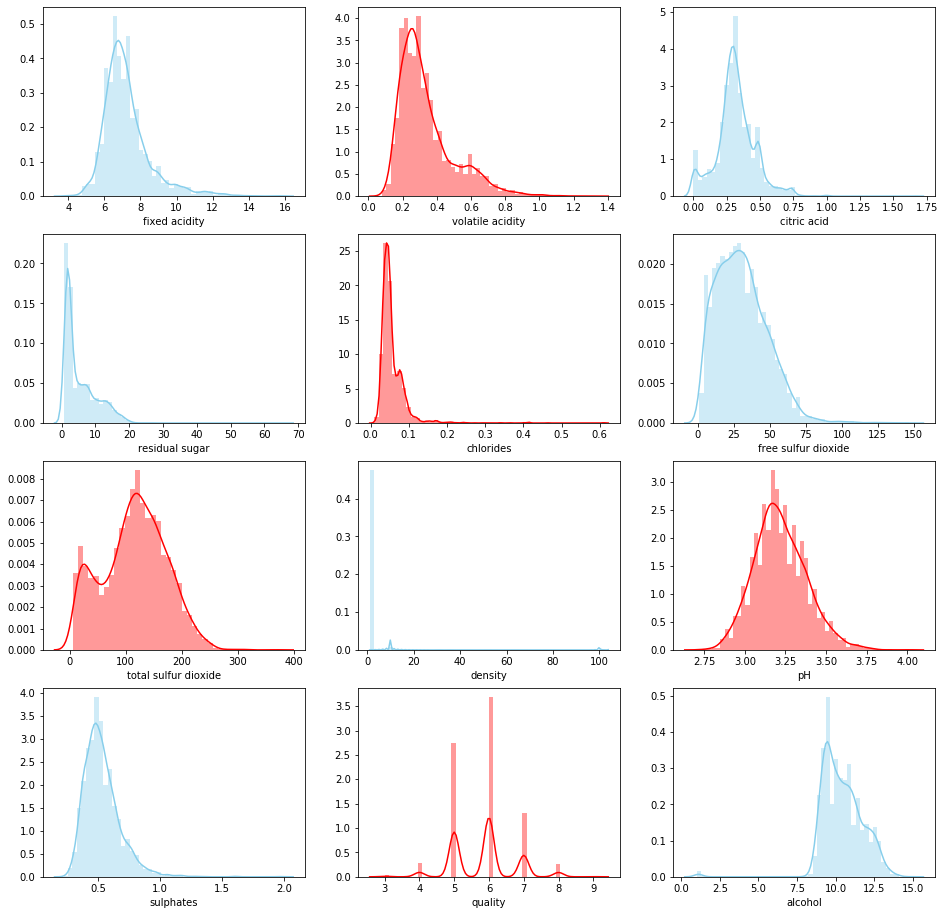

In [235]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

sns.distplot(train['fixed acidity'] , color = 'skyblue', label = 'age_years', ax = axes[0,0])
sns.distplot(train['volatile acidity'] , color = 'red', label = 'volatile acidity', ax = axes[0,1])
sns.distplot(train['citric acid'] , color = 'skyblue', label = 'citric acid', ax = axes[0,2])

sns.distplot(train['residual sugar'] , color = 'skyblue', label = 'residual sugar', ax = axes[1,0])
sns.distplot(train['chlorides'] , color = 'red', label = 'chlorides', ax=axes[1,1])
sns.distplot(train['free sulfur dioxide'] , color = 'skyblue', label = 'free sulfur dioxide', ax = axes[1,2])

sns.distplot(train['total sulfur dioxide'] , color = 'red', label = 'total sulfur dioxide', ax = axes[2,0])
sns.distplot(train['density'] , color = 'skyblue', label = 'density', ax = axes[2,1])
sns.distplot(train['pH'] , color = 'red', label = 'pH', ax = axes[2,2])

sns.distplot(train['sulphates'] , color = 'skyblue', label = 'sulphates', ax = axes[3,0])
sns.distplot(train['quality'] , color = 'red', label  ='quality', ax = axes[3,1])
sns.distplot(train['alcohol'] , color = 'skyblue', label = 'alcohol', ax = axes[3,2])

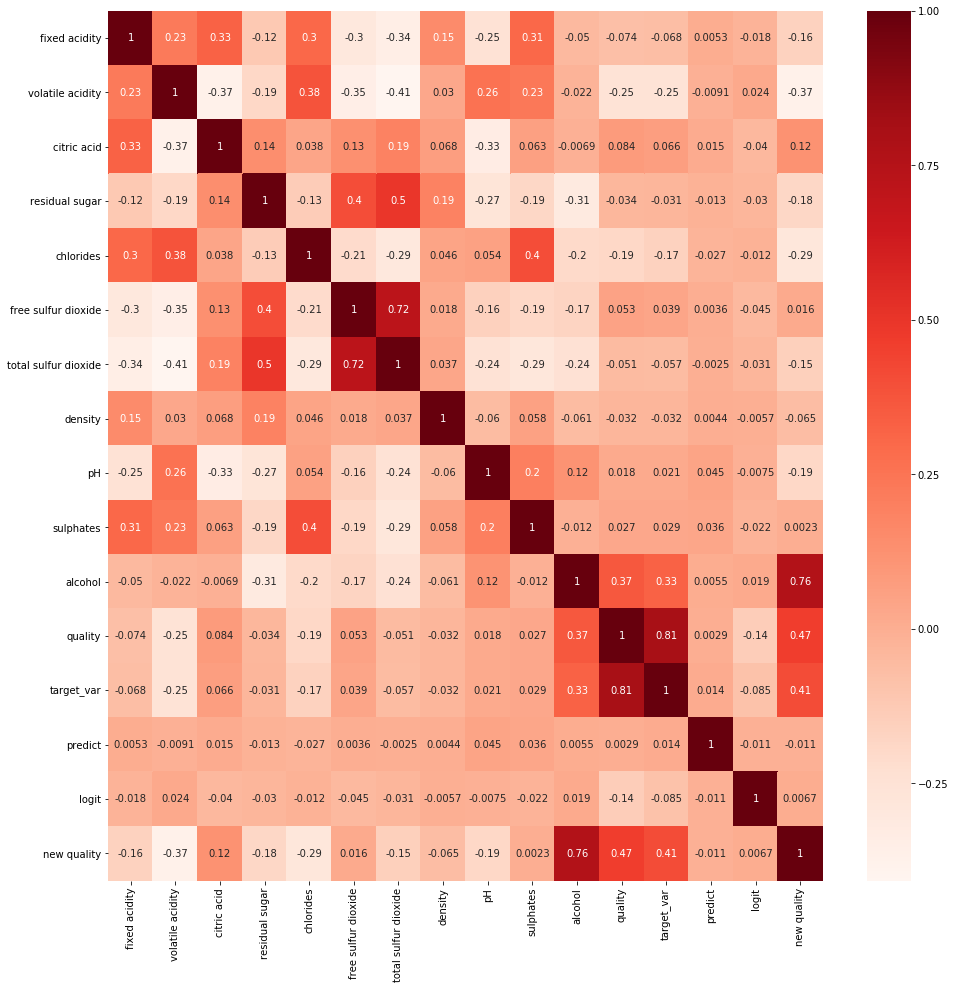

In [236]:
plt.figure(figsize=(16,16))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [237]:
train.groupby(['target_var','type']).agg({
'target_var':'count',
'volatile acidity':'mean',
'citric acid':'mean',
'residual sugar':'mean',
'chlorides':'mean',
'free sulfur dioxide':'mean',
'total sulfur dioxide':'mean',
'density':'mean',
'pH':'mean',
'sulphates':'mean',
'quality':'mean',
'alcohol':'mean',
})

target_var  volatile acidity  citric acid  residual sugar  \
target_var type                                                               
0          Red           551          0.578494     0.242632        2.539292   
           White        1231          0.309370     0.333777        7.023517   
1          Red           669          0.472324     0.295501        2.505680   
           White        2421          0.261964     0.333722        6.103366   

                  chlorides  free sulfur dioxide  total sulfur dioxide  \
target_var type                                                          
0          Red     0.092018            16.727768             55.000907   
           White   0.050479            35.414297            148.509748   
1          Red     0.082040            15.313154             38.919283   
           White   0.043221            35.408715            133.312474   

                   density        pH  sulphates   quality    alcohol  
target_var type                                                       
0          Red    2.535257  3.310962   0.618040  4.909256   9.931307  
           White  1.719440  3.169846   0.484151  4.878148   9.823513  
1          Red    1.561731  3.310075   0.688954  6.281016  10.822662  
           White  1.463946  3.195841   0.491644  6.375878  10.747731

## Distribuição das variáveis para o dataframe de teste

Pelas distribuições das variáveis abaixo, a função de separação do scikitlearn entre dataframes de teste e treinamento funcionou bem, já que as distribuições tem o mesmo comportamente que o dataframe de treinamento e o dafaframe completo.

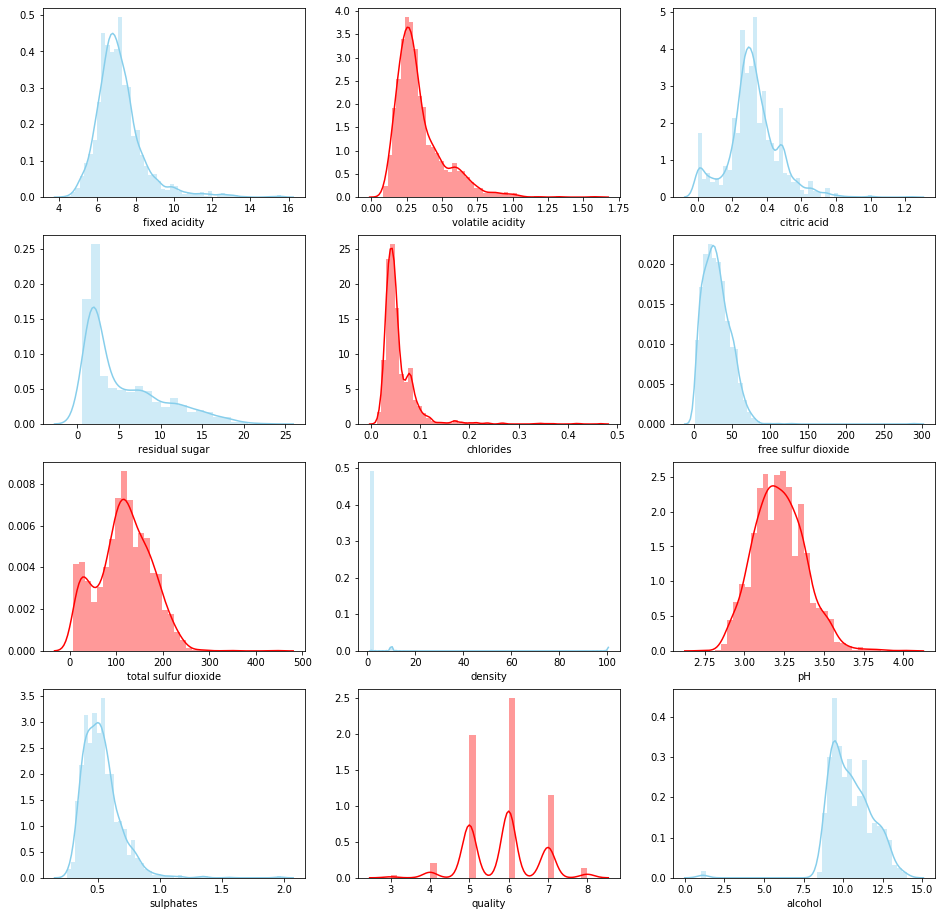

In [238]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

sns.distplot(test['fixed acidity'] , color = 'skyblue', label = 'age_years', ax = axes[0,0])
sns.distplot(test['volatile acidity'] , color = 'red', label = 'volatile acidity', ax = axes[0,1])
sns.distplot(test['citric acid'] , color = 'skyblue', label = 'citric acid', ax = axes[0,2])

sns.distplot(test['residual sugar'] , color = 'skyblue', label = 'residual sugar', ax = axes[1,0])
sns.distplot(test['chlorides'] , color = 'red', label = 'chlorides', ax=axes[1,1])
sns.distplot(test['free sulfur dioxide'] , color = 'skyblue', label = 'free sulfur dioxide', ax = axes[1,2])

sns.distplot(test['total sulfur dioxide'] , color = 'red', label = 'total sulfur dioxide', ax = axes[2,0])
sns.distplot(test['density'] , color = 'skyblue', label = 'density', ax = axes[2,1])
sns.distplot(test['pH'] , color = 'red', label = 'pH', ax = axes[2,2])

sns.distplot(test['sulphates'] , color = 'skyblue', label = 'sulphates', ax = axes[3,0])
sns.distplot(test['quality'] , color = 'red', label  ='quality', ax = axes[3,1])
sns.distplot(test['alcohol'] , color = 'skyblue', label = 'alcohol', ax = axes[3,2])

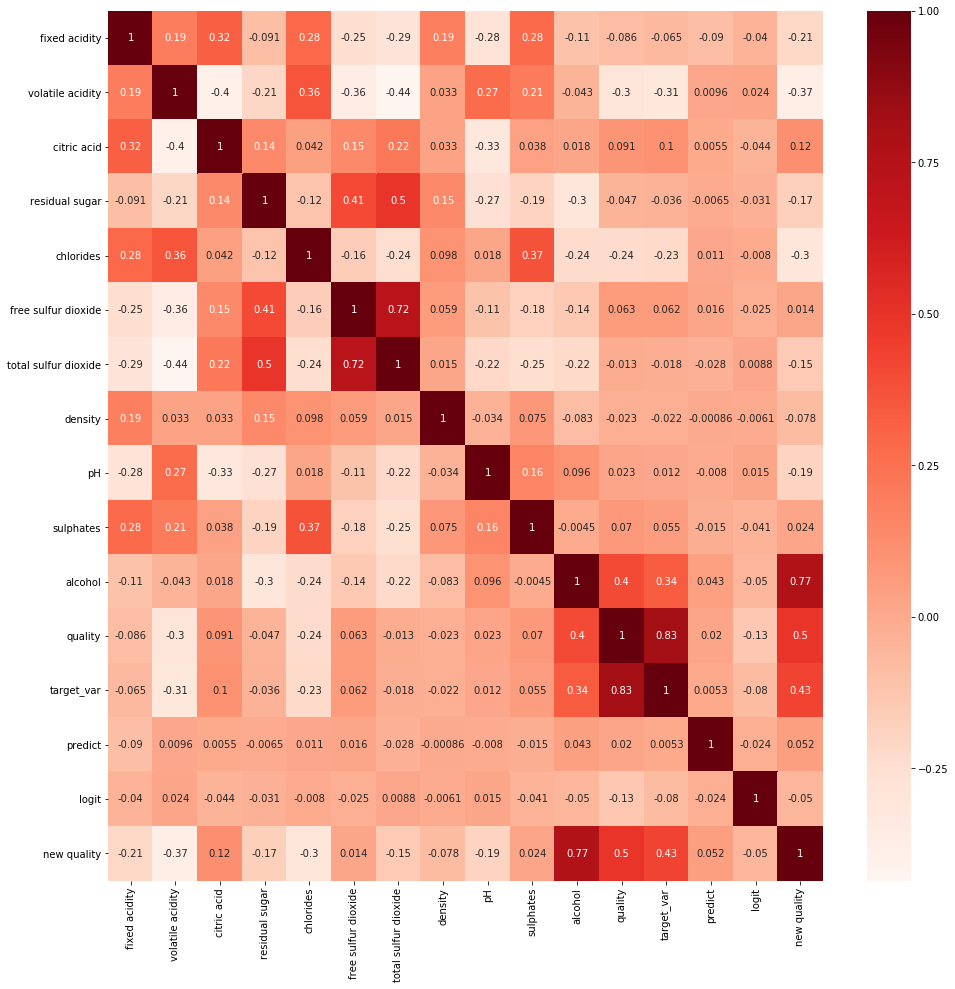

In [239]:
plt.figure(figsize=(16,16))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [240]:
test.groupby(['target_var','type']).agg({
'target_var':'count',
'volatile acidity':'mean',
'citric acid':'mean',
'residual sugar':'mean',
'chlorides':'mean',
'free sulfur dioxide':'mean',
'total sulfur dioxide':'mean',
'density':'mean',
'pH':'mean',
'sulphates':'mean',
'quality':'mean',
'alcohol':'mean',
})

target_var  volatile acidity  citric acid  residual sugar  \
target_var type                                                               
0          Red           193          0.620933     0.223834        2.550000   
           White         409          0.312958     0.335917        7.147555   
1          Red           186          0.480699     0.315645        2.644892   
           White         837          0.262575     0.335317        5.925448   

                  chlorides  free sulfur dioxide  total sulfur dioxide  \
target_var type                                                          
0          Red     0.095762            16.108808             53.629534   
           White   0.054315            35.111247            148.863081   
1          Red     0.084892            15.126344             40.908602   
           White   0.042054            34.956989            132.903823   

                   density        pH  sulphates   quality    alcohol  
target_var type                                                       
0          Red    2.677614  3.313627   0.619948  4.880829   9.912694  
           White  1.832191  3.172298   0.473545  4.870416   9.808196  
1          Red    3.081778  3.312688   0.705806  6.252688  10.755140  
           White  1.402239  3.201254   0.500992  6.400239  10.860088

## Modelo de regressão e output 

In [241]:
x = train[[
#'type',
'fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
#'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
#'density',
'pH',
'sulphates',
'alcohol',
#'quality'
]]

y = train['target_var']

logit = sm.Logit(y, x)
result = logit.fit(method='bfgs')
print(result.summary())

         Current function value: 0.550767
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:             target_var   No. Observations:                 4872
Model:                          Logit   Df Residuals:                     4863
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Apr 2020   Pseudo R-squ.:                  0.1613
Time:                        08:22:25   Log-Likelihood:                -2683.3
converged:                      False   LL-Null:                       -3199.3
Covariance Type:            nonrobust   LLR p-value:                1.992e-217
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.1485      0.029     -5.094   

C:\Users\osvaldo.pereira\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [242]:
y_train_prob = result.predict(x)
train['probit'] = y_train_prob

y_train_pred = [0 if x < 0.5 else 1 for x in y_train_prob]
#y_predict = pd.DataFrame(y_pred)
train['predict'] = y_train_pred

y_train_logit = np.exp(y_train_prob)/(np.exp(y_train_prob) - 1)
train['logit'] = y_train_logit

In [243]:
train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target_var,predict,logit,new quality,probit
1349,White,9.2,0.35,0.39,0.9,0.042,15.0,61.0,0.99240,2.96,0.28,10.4,4,0,1,2.361960,1.418293,0.550567
3913,White,7.2,0.25,0.32,1.5,0.054,24.0,105.0,0.99154,3.17,0.48,11.1,6,1,1,1.843113,2.593813,0.782110
4000,White,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,1,1,1.692130,4.156454,0.893969
6273,Red,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5,0,0,4.025030,0.463400,0.285611
2978,White,6.6,0.23,0.20,11.4,0.044,45.0,131.0,0.99604,2.96,0.51,9.7,6,1,1,1.810060,2.499472,0.804007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,White,6.8,0.29,0.56,11.9,0.043,66.0,230.0,0.99720,3.02,0.63,9.3,5,0,1,2.373313,1.159129,0.547061
6047,Red,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0,6,1,1,1.773085,2.976660,0.830087
2615,White,6.5,0.18,0.41,14.2,0.039,47.0,129.0,0.99678,3.28,0.72,10.3,7,1,1,1.696581,3.003354,0.890186
1039,White,7.5,0.17,0.34,1.4,0.035,13.0,102.0,0.99180,3.05,0.74,11.0,5,0,1,1.710561,3.875457,0.878522


# Validação do Modelo Final

Nesta seção aplicamos testes comuns à modelos de regressão logística, como por exemplo erro médio quadrático, erro médio absoluto, matriz de confusão, acurácia, precisão, recall, curva ROC.

## Definindo os array de teste x e y.

In [244]:
x_test = test[[
#'type',
'fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
#'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
#'density',
'pH',
'sulphates',
'alcohol',
#'quality'
]]

y_test = test['target_var']

y_test_prob = result.predict(x_test)
y_test_logit = np.exp(y_test_prob)/(np.exp(y_test_prob) - 1)
y_test_pred = [0 if x < 0.5 else 1 for x in y_test_prob]

## Matriz de confusão

Text(0.5, 257.44, 'Predicted label')

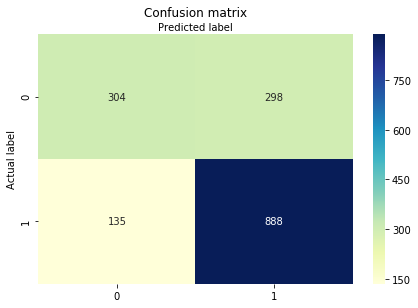

In [245]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
# cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Acurácia, precisão e recall

In [246]:
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))

Accuracy: 0.7335384615384616
Precision: 0.7487352445193929
Recall: 0.8680351906158358


In [247]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       602
           1       0.75      0.87      0.80      1023

    accuracy                           0.73      1625
   macro avg       0.72      0.69      0.69      1625
weighted avg       0.73      0.73      0.72      1625



## Curva ROC

O score AUC obtido foi de 0.79.

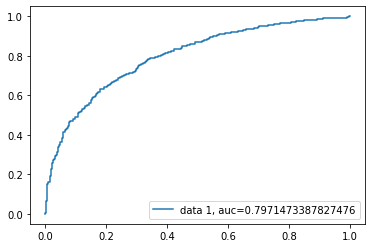

In [248]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_prob)
auc = metrics.roc_auc_score(y_test, y_test_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Criando o score de 0 à 10 para o dataframe inteiro

## Criando o score

Para criar o score simplesmente utilizei o probit do modelo de regressão logística e o resultado final é um score que varia de 0 à 10 de forma contínua, com casas decimais. Para o novo score dei o nome de "new quality" e acrescentei esta coluna ao dataframe.

In [249]:
x_full = df[[
#'type',
'fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
#'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
#'density',
'pH',
'sulphates',
'alcohol',
#'quality'
]]

y_full = df['target_var']

y_full_prob = result.predict(x_full)
df['new quality'] = y_full_prob * 10

# y_full_pred = [0 if x < 0.5 else 1 for x in y_full_prob]
# y_predict = pd.DataFrame(y_pred)
#cdf['predict'] = y_full_pred

# y_train_logit = np.exp(y_train_prob)/(np.exp(y_train_prob) - 1)
# train['logit'] = y_train_logit

## Distribuição dos score

Abaixo foi plotado os gráficos de distribuição da variável quality, new quality e target_var do dataframe completo. Lembrando que a target_var foi construída a partir da variável quality tendo valores iguais a 1 se os valores de quality fossem maiores que 5 e obtendo valor 0 se os valores de quality fossem menores ou iguais a 5. O gráfico da distribuição da new quality mostra um desbalanceamento que foi causado pela distribuição da variável dependente target_var, que apresenta claramente uma proporção maior de 1.

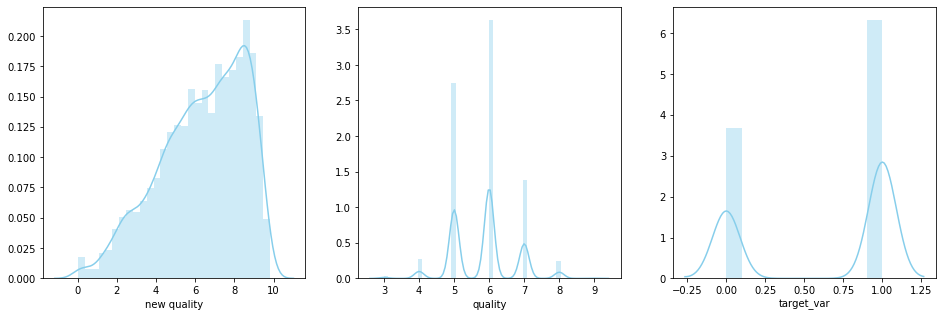

In [250]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.distplot(df['new quality'] , color = 'skyblue', label = 'alcohol', ax = axes[0])
sns.distplot(df['quality'] , color = 'skyblue', label = 'alcohol', ax = axes[1])
sns.distplot(df['target_var'] , color = 'skyblue', label = 'alcohol', ax = axes[2])

# Conclusão

Utilizei um modelo de regressão logística como um modelo de classificação de um bom vinho. Uma observação: o leitor que quiser continuar com este case pode testar outros modelos de classificação como por exemplo support vector classifier (SVC), Stochastic Gradient Decent Classifier, Random Forest Classifier, Decision Tree Classifier, Gaussian Naive Bayes, K-Neighbors Classifier, K-Means e Ada Boost Classifier e usar o K-fold Cross Validation(CV) para realizar testes de comparação entre os diferentes algoritmos de classificação.

**Como foi a definição da sua estratégia de modelagem?**
\
R: Primeiro analisei o dataset e quais tipos de variáveis possuía, vi que eram quase todas numéricas, sendo uma delas a quality (qualidade do vinho) e pensei logo em fazer um score de bons e maus análogo a um score de risco de crédito, criando uma variável target binária e então utilizar um modelo de regressão logística. Utilizei uma simples função de ativação criando um corte na nota 5 equivalente à curva S resultante do logit. Os resultados dos primeiros testes da regressão foram bastante satisfatórios e resolvi seguir com esta estratégia.

**Como foi definida a função de custo utilizada?**
\
R: Eu não precisei definir a priori a função custo, terceirizei esta decisão para o algoritmo inbuilt do statsmodel do Python, simplesmente escolhi meu modelo de regressão logística e criei uma variável dependente, o algoritmo utiliza maximun likelyhood como método de convergência e a função custo é a otimização do logit ou seja o log natural da odds $\log_{e}\left(\frac{p}{1-p}\right)$ como pode ser confirmado nas notas de aula do Andrew Ng (Ng, Andrew (2000). "CS229 Lecture Notes" (PDF). CS229 Lecture Notes: 16–19.) no link https://akademik.bahcesehir.edu.tr/~tevfik/courses/cmp5101/cs229-notes1.pdf.

**Qual foi o critério utilizado na seleção do modelo final?**
\
R: Escolhi um dos modelos mais conhecidos de classificação, a regressão logística. Me baseei nas análises prévias do dataset e cheguei à conclusão de que seria uma boa estratégia, eficiente e pragmática. Os primeiros resultados foram bastante satisfatórios então decidi seguir nesta linha até o final.

**Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método?**
\
R: Utilizei os métodos mais conhecidos de validação e os principais indicadores. Trabalhei bastante tempo com modelos de risco de crédito e possuo bastante familiaridade com modelos de classificação e suas métricas de avaliação.

**Quais evidências você possui de que seu modelo é suficientemente bom?**
\
R: Os p-value da regressão foram todos abaixo de 0.05, os principais testes para o modelo de regressão foram satisfatórios como mostram os valores abaixo de acurácia, precisão, recall e score AUC. A curva ROC obteve também um formato satisfatório demonstrando um poder razoável de separação entre 'bons' (1) e 'maus' (0).

* Accuracy: 0.73
* Precision: 0.75
* Recall: 0.87
* Score AUC = 0.79